In [2]:
pip install --upgrade pip

In [3]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))


GPU: []
Num GPUs: 0


In [3]:
pip install tf-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.6/429.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 50.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attemp

In [4]:
print(tf.__version__)

2.10.0


In [5]:
## import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head(

)

In [8]:
## Divide the dataset into independet and dependent features

X=dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]

In [ ]:
X.head()

In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [11]:
## feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [12]:
## concatenate these variables with dataframe
X=X.drop(['Gender', "Geography"],axis=1)


In [13]:
X=pd.concat([X,geography,gender],axis=1)

In [14]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [74]:
X_train.shape

(8000, 11)

In [75]:
## Part 2 Creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [76]:
## Initialize the ANN
classifier = Sequential()


In [77]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))


In [78]:
## Adding 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [79]:
## Adding 2nd Hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))


In [80]:
## Adding output layer
classifier.add(Dense(1,activation='sigmoid'))


In [81]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
import tensorflow
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [83]:
## Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [84]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4754 - accuracy: 0.7921 - val_loss: 0.4195 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4319 - accuracy: 0.7957 - val_loss: 0.4126 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4109 - accuracy: 0.8127 - val_loss: 0.3847 - val_accuracy: 0.8387
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3900 - accuracy: 0.8319 - val_loss: 0.3792 - val_accuracy: 0.8379
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3758 - accuracy: 0.8472 - val_loss: 0.3747 - val_accuracy: 0.8432
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3800 - accuracy: 0.8433 - val_loss: 0.3827 - val_accuracy: 0.8455
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3748 - accuracy: 0.8431 - val_loss: 0.3726 - val_accuracy:

In [85]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

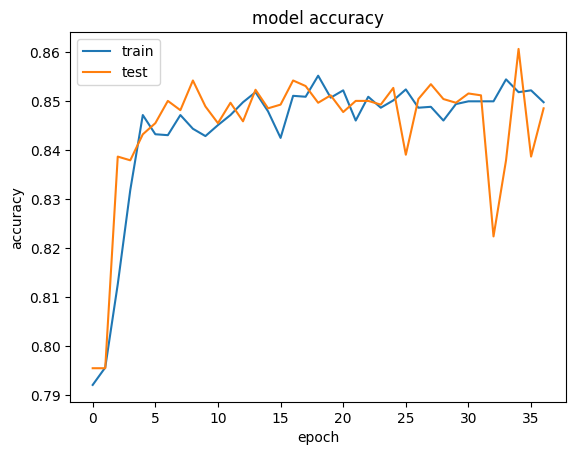

In [86]:
## summarize history from accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

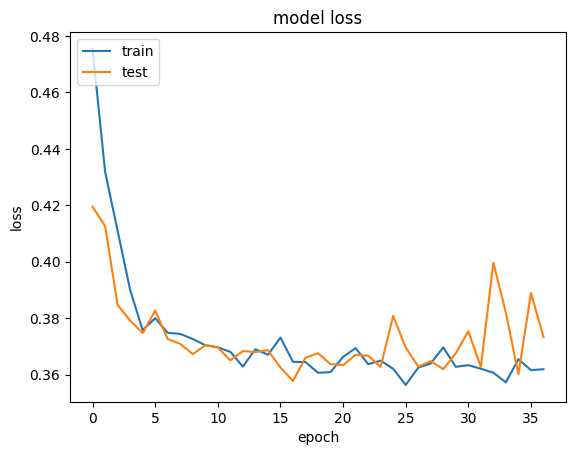

In [87]:
## summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [88]:
##Part 3 - Making the predictions and evaluating the model

# Prediction the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [91]:
## making the confussion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1545,   50],
       [ 233,  172]])

In [92]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [93]:
score

0.8585

In [94]:
## get the weights
classifier.get_weights()

[array([[ 0.5482581 ,  0.21345861, -0.5858817 , -0.72938156, -0.46293414,
          0.79991853,  0.27025124, -0.16171062,  1.4575325 , -1.0931937 ,
         -0.5429034 ],
        [ 1.7387627 ,  0.79776883, -2.5771992 ,  1.4467272 ,  2.6248431 ,
         -1.8621411 ,  0.26773965,  0.79607224, -0.7794664 ,  0.6215069 ,
         -3.2153351 ],
        [ 0.16367565, -0.12506051,  0.67566264,  0.20163448,  0.5124885 ,
          0.04417486,  0.01603947, -0.04280414,  0.52408034,  0.53515863,
          0.2741809 ],
        [-1.219119  ,  0.11522441, -1.4100697 , -0.15065804, -0.42871147,
         -1.2836015 , -2.866437  ,  1.3485215 , -1.5720816 , -1.9261117 ,
         -0.4414352 ],
        [ 0.381293  ,  2.7202492 , -0.1129021 , -3.4136283 , -0.05208252,
         -0.87379557, -3.2133133 ,  3.2507281 ,  0.7076101 , -0.64338726,
         -0.06826105],
        [-0.31618908, -0.0304596 , -0.60161185, -0.17775735, -0.3322233 ,
          1.997962  , -0.22459242, -0.4099414 , -0.64798474,  0.1814607